<a href="https://www.kaggle.com/code/amarmoibrahim964/covid-19-machine-learning-cart?scriptVersionId=141460426" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Covid 19 Machine Learning Project CART

![/kaggle/input/corona/corona.jpg](https://images.pexels.com/photos/4031867/pexels-photo-4031867.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)

# Introduction

**Coronavirus** disease 2019 (COVID-19) is a contagious disease caused by the virus severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). The first known case was identified in Wuhan, China, in December 2019.The disease quickly spread worldwide, resulting in the COVID-19 pandemic.

Machine learning (ML) is a subfield of artificial intelligence, which is used to perform complex tasks in a way that is similar to how humans solve problems. ML starts with data numbers, photos, or text, like bank transactions, repair records, time series data from sensors or reports and predicts the
corresponding result. There are two ways in which the machine learns. It could be supervised ML,
unsupervised ML or reinforcement ML. Supervised ML could be in the form of CART algorithm, which
is used in this project for regression analysis. CART can be applied to predict a categorical target variable producing a classification tree, or continuous target variable producing a regression tree. We have used this method to explain the statistics of corona cases around the world depending on region specificities.


# Method

To set up our model, we rely on two main methods, **the classification and regression tree ( CART)** and
to assess our performance, we utilized **( K fold cross validation)** , but we will shed light on the cross
validation in details when we evaluate our model.

 

![/kaggle/input/tree-reg2/tree reg.jpg](https://www.analyticssteps.com/backend/media/thumbnail/2578400/1990226_1626945689_CART%20algorithmArtboard%201%20copy.jpg)

Regression analysis of the decision tree type is used in predictive models to predict a continuous target variable in supervised learning. The fundamental idea is to divide the data set into more manageable sections. Both linear and non-linear relationships can be studied using this non-parametric approach.
Decision trees come in two primary variants: categorical (classification trees) and numerical variables
(regression tree). Numerical or categorical explanatory variables are also acceptable. A numerical label
is estimated via regression. This implies that the possible values for the output are unlimited ( Glenn
De'ath, et al 2000) . We utilize decision tree regression in the corona dataset because it contains
numerical variable.


On the one hand, the advantage of decision trees is that they are easy to understand. The decision tree
can tolerate missing data and preserve accuracy, and it doesn't require extensive data preparation such
as normalization or standardization ( Glenn De'ath, et al 2000 ) . It can simulate nonlinear input–output
relationships. On the other hand, the disadvantage of decision trees, is that they can be biased towards
features with many levels, which makes it more likely that they will be chosen as splits in the tree.
Additionally, the decision tree algorithm chooses the best split at each step without taking the effects
2
of future splits into account. And changing the data slightly can result in insignificant changes to the
structure.

# Application
1. **Installing the packages and importing the dataset** For our project we chose Python language through installing packages, libraries and loading the dataset. We require in our model packages such as Pyreadr to read data in python, numPy (Numerical Python library), matplotlib (Python data visualization library), seaborn (Python advanced data visualization library), Scikit-learn (Python machine learning library)


In [1]:
! pip install pyreadr
! pip install matplotlib.pyplot as plt
! pip install seaborn as sns
! pip install sklearn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.8/434.8 kB 11.8 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot
ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as
  Preparing metadata (setup.py) ... - \ done
  Created wheel for sklearn: filename=sklearn-0.0.post7-py3-none-any.whl size=2360 sha256=d3f2ce645a5c2cad9c299131bd8b99540e3b3fef158ecb9fe9dcac62c6a2135d
  Stored in directory: /root/.cache/pip/wheels/c8/9c/85/72901eb50bc4bc6e3b2629378d172384ea3dfd19759c77fd2c
Successfully built sklearn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadr
from sklearn.model_selection import train_test_split

In [3]:
result = pyreadr.read_r('/kaggle/input/corona-data/CoronaData (1).rdata')
df = result["df"]
df

,location,year,month,new_cases_pm,iso_code,continent,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,date
0,Afghanistan,2020.0,2.0,0.017,AFG,Asia,54.422,18.6,2.581,1803.987,NaN,64.83,0.511,2020-02-01
1,Afghanistan,2020.0,3.0,2.482,AFG,Asia,54.422,18.6,2.581,1803.987,NaN,64.83,0.511,2020-03-01
2,Afghanistan,2020.0,4.0,35.295,AFG,Asia,54.422,18.6,2.581,1803.987,NaN,64.83,0.511,2020-04-01
3,Afghanistan,2020.0,5.0,282.080,AFG,Asia,54.422,18.6,2.581,1803.987,NaN,64.83,0.511,2020-05-01
4,Afghanistan,2020.0,6.0,426.322,AFG,Asia,54.422,18.6,2.581,1803.987,NaN,64.83,0.511,2020-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,Zambia,2022.0,8.0,163.604,ZMB,Africa,22.995,17.7,2.480,3689.251,57.5,63.89,0.584,2022-08-01
2223,Zambia,2022.0,9.0,36.245,ZMB,Africa,22.995,17.7,2.480,3689.251,57.5,63.89,0.584,2022-09-01
2224,Zambia,2022.0,10.0,9.183,ZMB,Africa,22.995,17.7,2.480,3689.251,57.5,63.89,0.584,2022-10-01
2225,Zambia,2022.0,11.0,3.035,ZMB,Africa,22.995,17.7,2.480,3689.251,57.5,63.89,0.584,2022-11-01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 2227 non-null   object 
 1   year                     2227 non-null   float64
 2   month                    2227 non-null   float64
 3   new_cases_pm             2227 non-null   float64
 4   iso_code                 2227 non-null   object 
 5   continent                2227 non-null   object 
 6   population_density       2157 non-null   float64
 7   median_age               2227 non-null   float64
 8   aged_65_older            2157 non-null   float64
 9   gdp_per_capita           2125 non-null   float64
 10  extreme_poverty          1673 non-null   float64
 11  life_expectancy          2227 non-null   float64
 12  human_development_index  2159 non-null   float64
 13  date                     2227 non-null   object 
dtypes: float64(10), object(4

For our project we chose Python language through installing packages, libraries and loading the
dataset. We require in our model packages such as Pyreadr to read data in python, numPy (Numerical
Python library), matplotlib (Python data visualization library), seaborn (Python advanced data
visualization library), Scikit-learn (Python machine learning library). When we are exploring our dataset,
we find 14 columns and 2227 rows in our data frame which contain 10 columns, numeric float 64, and
4 string variables. Then columns of our data include location, year, month, new_cases_pm, iso_code,
continent, population_density, median_age, aged_65_older, gdp_per_capita, extreme_poverty,
life_expectancy, human development index and date.

**2.Preparation and cleaning the data**


Before using the data, we need to prepare our data to be used in the model. That means removing the
duplicate data and dealing with the null values. First, we filtered our data by choosing the data of two
months (January and July 2021) and then only selecting the entries whose dependent parameter stays
either in the lowest 40% or the highest 40%.

In [5]:
#Get same Statistical information (mean & stander error & max & Min)
df.describe()

,year,month,new_cases_pm,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index
count,2227.000000,2227.000000,2227.000000,2157.000000,2227.000000,2157.000000,2125.000000,1673.000000,2227.000000,2159.000000
mean,2021.033678,6.673103,2870.583053,137.252997,29.303458,8.186694,15233.821254,16.184638,71.889322,0.696414
std,0.808889,3.379954,9213.842858,182.918667,9.597948,6.222145,14645.941357,22.494191,7.503837,0.155545
min,2020.000000,1.000000,0.000000,3.202000,15.100000,2.168000,808.133000,0.100000,54.690000,0.394000
25%,2020.000000,4.000000,18.644500,36.253000,19.800000,3.158000,3523.984000,0.600000,65.460000,0.557000
50%,2021.000000,7.000000,193.822000,81.721000,29.100000,5.809000,10550.206000,3.500000,72.270000,0.711000
75%,2022.000000,10.000000,1664.728500,197.519000,38.300000,11.198000,24765.954000,23.800000,76.980000,0.820000
max,2022.000000,12.000000,185232.946000,1265.036000,48.200000,27.049000,54225.446000,77.600000,84.630000,0.947000


In [6]:
df.columns

Index(['location', 'year', 'month', 'new_cases_pm', 'iso_code', 'continent',
       'population_density', 'median_age', 'aged_65_older', 'gdp_per_capita',
       'extreme_poverty', 'life_expectancy', 'human_development_index',
       'date'],
      dtype='object')

In [7]:
df['location'].unique()

array(['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Australia',
       'Bangladesh', 'Brazil', 'Burkina Faso', 'Cameroon', 'Canada',
       'China', 'Colombia', "Cote d'Ivoire",
       'Democratic Republic of Congo', 'Egypt', 'Ethiopia', 'France',
       'Germany', 'Ghana', 'India', 'Indonesia', 'Iran', 'Iraq', 'Italy',
       'Japan', 'Kenya', 'Madagascar', 'Malawi', 'Malaysia', 'Mali',
       'Mexico', 'Morocco', 'Mozambique', 'Myanmar', 'Nepal', 'Niger',
       'Nigeria', 'North Korea', 'Pakistan', 'Peru', 'Philippines',
       'Poland', 'Romania', 'Russia', 'Saudi Arabia', 'South Africa',
       'South Korea', 'Spain', 'Sri Lanka', 'Sudan', 'Syria', 'Taiwan',
       'Tanzania', 'Thailand', 'Turkey', 'Uganda', 'Ukraine',
       'United Kingdom', 'United States', 'Uzbekistan', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia'], dtype=object)

In [8]:
df['year'].unique()

array([2020., 2021., 2022.])

In [9]:
df['month'].unique()

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,  1.])

In [10]:
# we filter the data with  January 2021 and July 2021

df1=df[df['year']==2021.0]
df=df1[(df1['month']==1.0)|(df1['month']==7.0 )]
df

,location,year,month,new_cases_pm,iso_code,continent,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,date
11,Afghanistan,2021.0,1.0,69.872,AFG,Asia,54.422,18.6,2.581,1803.987,NaN,64.83,0.511,2021-01-01
17,Afghanistan,2021.0,7.0,758.426,AFG,Asia,54.422,18.6,2.581,1803.987,NaN,64.83,0.511,2021-07-01
46,Algeria,2021.0,1.0,178.738,DZA,Africa,17.348,29.1,6.211,13913.839,0.5,76.88,0.748,2021-01-01
52,Algeria,2021.0,7.0,632.952,DZA,Africa,17.348,29.1,6.211,13913.839,0.5,76.88,0.748,2021-07-01
80,Angola,2021.0,1.0,65.995,AGO,Africa,23.890,16.8,2.405,5819.495,NaN,61.15,0.581,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,Vietnam,2021.0,7.0,1110.488,VNM,Asia,308.127,32.6,7.150,6171.884,2.0,75.40,0.704,2021-07-01
2169,Yemen,2021.0,1.0,0.727,YEM,Asia,53.508,20.3,2.922,1479.147,18.8,66.12,0.470,2021-01-01
2175,Yemen,2021.0,7.0,3.658,YEM,Asia,53.508,20.3,2.922,1479.147,18.8,66.12,0.470,2021-07-01
2203,Zambia,2021.0,1.0,1511.577,ZMB,Africa,22.995,17.7,2.480,3689.251,57.5,63.89,0.584,2021-01-01


In [11]:
#code in low and high (lowest 40%, highest 40%)
# get highest 40%
df_high=df[df['new_cases_pm'] >=df['new_cases_pm'].quantile(0.60)]


# get Lowest 40%
df_low=df[df['new_cases_pm'] <=df['new_cases_pm'].quantile(0.40)]



In [12]:
df40=df[ (df['new_cases_pm'] <=df['new_cases_pm'].quantile(0.40) ) | (df['new_cases_pm'] >=df['new_cases_pm'].quantile(0.60) )  ]
df40

,location,year,month,new_cases_pm,iso_code,continent,population_density,median_age,aged_65_older,gdp_per_capita,extreme_poverty,life_expectancy,human_development_index,date
11,Afghanistan,2021.0,1.0,69.872,AFG,Asia,54.422,18.6,2.581,1803.987,NaN,64.83,0.511,2021-01-01
46,Algeria,2021.0,1.0,178.738,DZA,Africa,17.348,29.1,6.211,13913.839,0.5,76.88,0.748,2021-01-01
80,Angola,2021.0,1.0,65.995,AGO,Africa,23.890,16.8,2.405,5819.495,NaN,61.15,0.581,2021-01-01
86,Angola,2021.0,7.0,105.475,AGO,Africa,23.890,16.8,2.405,5819.495,NaN,61.15,0.581,2021-07-01
116,Argentina,2021.0,1.0,6774.655,ARG,South America,16.177,31.9,11.198,18933.907,0.6,76.67,0.845,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,Vietnam,2021.0,7.0,1110.488,VNM,Asia,308.127,32.6,7.150,6171.884,2.0,75.40,0.704,2021-07-01
2169,Yemen,2021.0,1.0,0.727,YEM,Asia,53.508,20.3,2.922,1479.147,18.8,66.12,0.470,2021-01-01
2175,Yemen,2021.0,7.0,3.658,YEM,Asia,53.508,20.3,2.922,1479.147,18.8,66.12,0.470,2021-07-01
2203,Zambia,2021.0,1.0,1511.577,ZMB,Africa,22.995,17.7,2.480,3689.251,57.5,63.89,0.584,2021-01-01


**cleaning data** : Check For Duplicate Data & Check Missing Values In

In [13]:
##Check For Duplicate Data

dup=df40.duplicated().any()
print("Any duplicate Value?",dup)

Any duplicate Value? False


In [14]:
## Check Missing Values In The Dataset

df40.isnull().sum()

pre_missing=df40.isnull().sum()*100/len(df)
pre_missing


location                    0.00000
year                        0.00000
month                       0.00000
new_cases_pm                0.00000
iso_code                    0.00000
continent                   0.00000
population_density          3.12500
median_age                  0.00000
aged_65_older               3.12500
gdp_per_capita              4.68750
extreme_poverty            19.53125
life_expectancy             0.00000
human_development_index     3.12500
date                        0.00000
dtype: float64

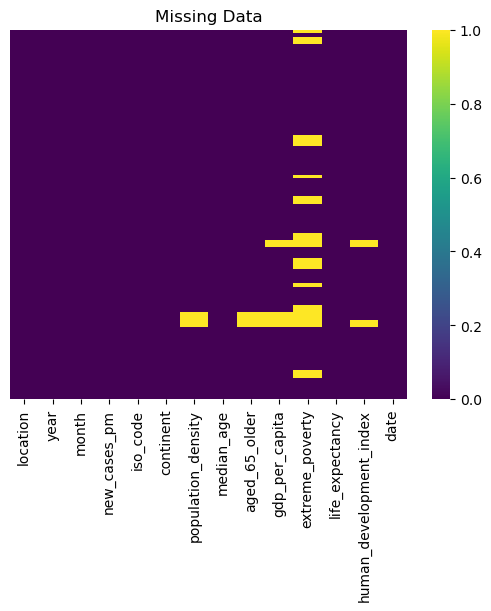

In [15]:
sns.heatmap(df40.isnull(),cmap='viridis',cbar=True,yticklabels=False)
plt.title("Missing Data")
plt.show()

We did not find any duplicate data but we detected some Null entries in independent variable. This
includes 3% of (Population density, human development index, aged_65_older), 5% in (GDP per capita)
and 20% in (extreme poverty). To address this issue, we can either replace the missing data with the
mean value if it is numerical, or just ignore and remove it. As the number of missing data was not
significant, we decided to remove entries with missing data. For that, we needed to drop out
(extreme_poverty) column first, because it has around 20% of missing entries. After cleaning our data.

In [16]:
#Drop the column extreme_poverty because it has 19.53125% miss data

df40.drop('extreme_poverty',axis=1,inplace=True)

/tmp/ipykernel_21/2119940789.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df40.drop('extreme_poverty',axis=1,inplace=True)


In [17]:
#Drop All the Missing Values
df40.dropna(how='any',inplace=True)


/tmp/ipykernel_21/241433455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df40.dropna(how='any',inplace=True)


In [18]:
df40

,location,year,month,new_cases_pm,iso_code,continent,population_density,median_age,aged_65_older,gdp_per_capita,life_expectancy,human_development_index,date
11,Afghanistan,2021.0,1.0,69.872,AFG,Asia,54.422,18.6,2.581,1803.987,64.83,0.511,2021-01-01
46,Algeria,2021.0,1.0,178.738,DZA,Africa,17.348,29.1,6.211,13913.839,76.88,0.748,2021-01-01
80,Angola,2021.0,1.0,65.995,AGO,Africa,23.890,16.8,2.405,5819.495,61.15,0.581,2021-01-01
86,Angola,2021.0,7.0,105.475,AGO,Africa,23.890,16.8,2.405,5819.495,61.15,0.581,2021-07-01
116,Argentina,2021.0,1.0,6774.655,ARG,South America,16.177,31.9,11.198,18933.907,76.67,0.845,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,Vietnam,2021.0,7.0,1110.488,VNM,Asia,308.127,32.6,7.150,6171.884,75.40,0.704,2021-07-01
2169,Yemen,2021.0,1.0,0.727,YEM,Asia,53.508,20.3,2.922,1479.147,66.12,0.470,2021-01-01
2175,Yemen,2021.0,7.0,3.658,YEM,Asia,53.508,20.3,2.922,1479.147,66.12,0.470,2021-07-01
2203,Zambia,2021.0,1.0,1511.577,ZMB,Africa,22.995,17.7,2.480,3689.251,63.89,0.584,2021-01-01


In [19]:
df40['continent'].unique()

array(['Asia', 'Africa', 'South America', 'Oceania', 'North America',
       'Europe'], dtype=object)

Encoding Categorical Data

Before creating our model, we needed to determine our desired predictors (independent variables)
and the target (dependent variable), where all of them must be numerical values. For that, we need to
assign numbers to some string parameters. Specifically, we created another column (locat_SOrN) as a
categorical value (North or South). We assigned North America, Europe, and Asia to North and the rest
of the world to South. Then we created another column (North_or_South) as the Dummy variable; for
North taking the value of 1 and for South the value of 0. Finally, we dropped out all categorical data
and unwanted columns and kept only numerical variables. In addition, we used the two months
(January and July) as a dummy variable.

In [20]:
#Create a Categorical North and South
def locat(locat):
    if locat in ['North America','Europe','Asia' ]:
        return "North"
    else:
        return "South"

df40['locat_SOrN']=df40['continent'].apply(locat)
df40

/tmp/ipykernel_21/3566171175.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df40['locat_SOrN']=df40['continent'].apply(locat)


,location,year,month,new_cases_pm,iso_code,continent,population_density,median_age,aged_65_older,gdp_per_capita,life_expectancy,human_development_index,date,locat_SOrN
11,Afghanistan,2021.0,1.0,69.872,AFG,Asia,54.422,18.6,2.581,1803.987,64.83,0.511,2021-01-01,North
46,Algeria,2021.0,1.0,178.738,DZA,Africa,17.348,29.1,6.211,13913.839,76.88,0.748,2021-01-01,South
80,Angola,2021.0,1.0,65.995,AGO,Africa,23.890,16.8,2.405,5819.495,61.15,0.581,2021-01-01,South
86,Angola,2021.0,7.0,105.475,AGO,Africa,23.890,16.8,2.405,5819.495,61.15,0.581,2021-07-01,South
116,Argentina,2021.0,1.0,6774.655,ARG,South America,16.177,31.9,11.198,18933.907,76.67,0.845,2021-01-01,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,Vietnam,2021.0,7.0,1110.488,VNM,Asia,308.127,32.6,7.150,6171.884,75.40,0.704,2021-07-01,North
2169,Yemen,2021.0,1.0,0.727,YEM,Asia,53.508,20.3,2.922,1479.147,66.12,0.470,2021-01-01,North
2175,Yemen,2021.0,7.0,3.658,YEM,Asia,53.508,20.3,2.922,1479.147,66.12,0.470,2021-07-01,North
2203,Zambia,2021.0,1.0,1511.577,ZMB,Africa,22.995,17.7,2.480,3689.251,63.89,0.584,2021-01-01,South


In [21]:
###create Dummy Variable
x=df40['locat_SOrN'].map({'North':1,'South':0})
df40.insert(14,'North_or_South ',x)


In [22]:
###create Dummy Variable
def season(season):
    if season == 1.0:
        return  1
    else:
        return  0

df40['Season']=df40['month'].apply(season)
df40

/tmp/ipykernel_21/2342977859.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df40['Season']=df40['month'].apply(season)


,location,year,month,new_cases_pm,iso_code,continent,population_density,median_age,aged_65_older,gdp_per_capita,life_expectancy,human_development_index,date,locat_SOrN,North_or_South,Season
11,Afghanistan,2021.0,1.0,69.872,AFG,Asia,54.422,18.6,2.581,1803.987,64.83,0.511,2021-01-01,North,1,1
46,Algeria,2021.0,1.0,178.738,DZA,Africa,17.348,29.1,6.211,13913.839,76.88,0.748,2021-01-01,South,0,1
80,Angola,2021.0,1.0,65.995,AGO,Africa,23.890,16.8,2.405,5819.495,61.15,0.581,2021-01-01,South,0,1
86,Angola,2021.0,7.0,105.475,AGO,Africa,23.890,16.8,2.405,5819.495,61.15,0.581,2021-07-01,South,0,0
116,Argentina,2021.0,1.0,6774.655,ARG,South America,16.177,31.9,11.198,18933.907,76.67,0.845,2021-01-01,South,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,Vietnam,2021.0,7.0,1110.488,VNM,Asia,308.127,32.6,7.150,6171.884,75.40,0.704,2021-07-01,North,1,0
2169,Yemen,2021.0,1.0,0.727,YEM,Asia,53.508,20.3,2.922,1479.147,66.12,0.470,2021-01-01,North,1,1
2175,Yemen,2021.0,7.0,3.658,YEM,Asia,53.508,20.3,2.922,1479.147,66.12,0.470,2021-07-01,North,1,0
2203,Zambia,2021.0,1.0,1511.577,ZMB,Africa,22.995,17.7,2.480,3689.251,63.89,0.584,2021-01-01,South,0,1


/tmp/ipykernel_21/2879341172.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df40.corr(), vmin=-1, vmax=1, annot=True)


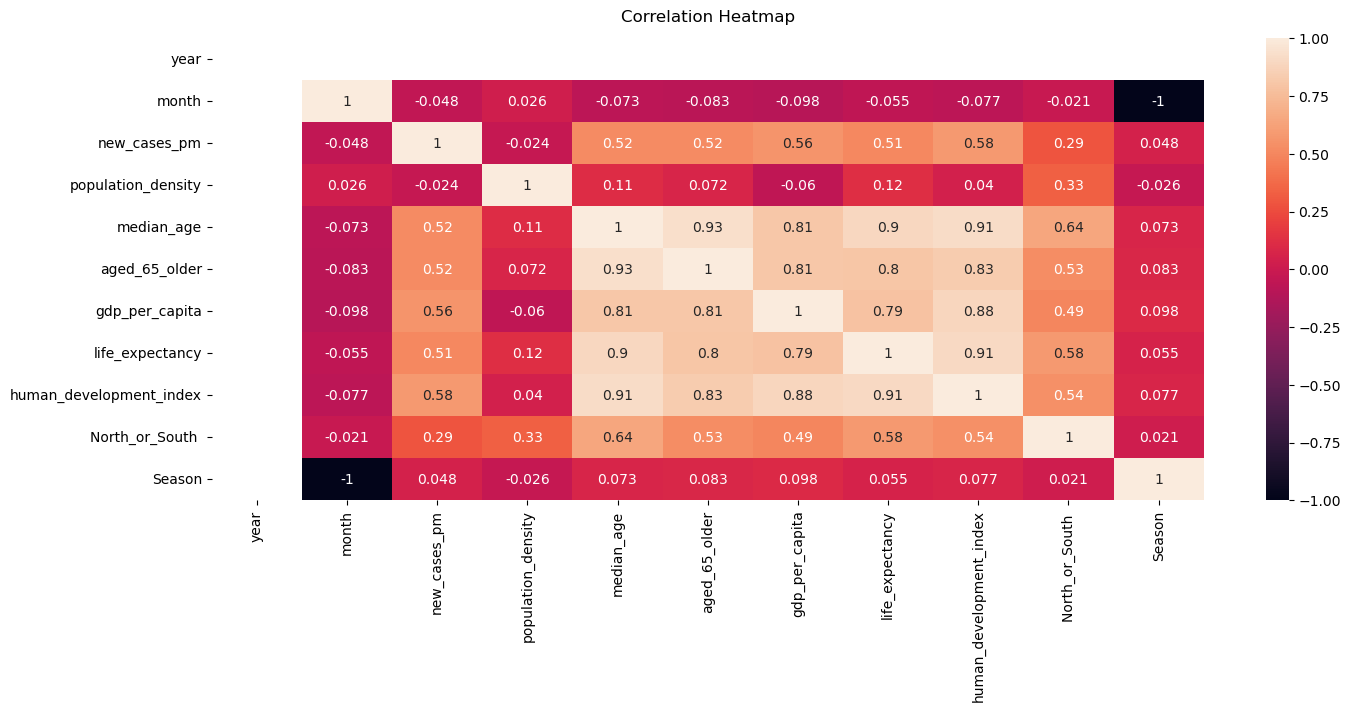

In [23]:
#3Check the correlation

#corr=df40.corr()
#corr.style.background_gradient(cmap='coolwarm',axis=None)

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df40.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

/tmp/ipykernel_21/2326521009.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df40.corr()[['new_cases_pm']].sort_values(by='new_cases_pm', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')


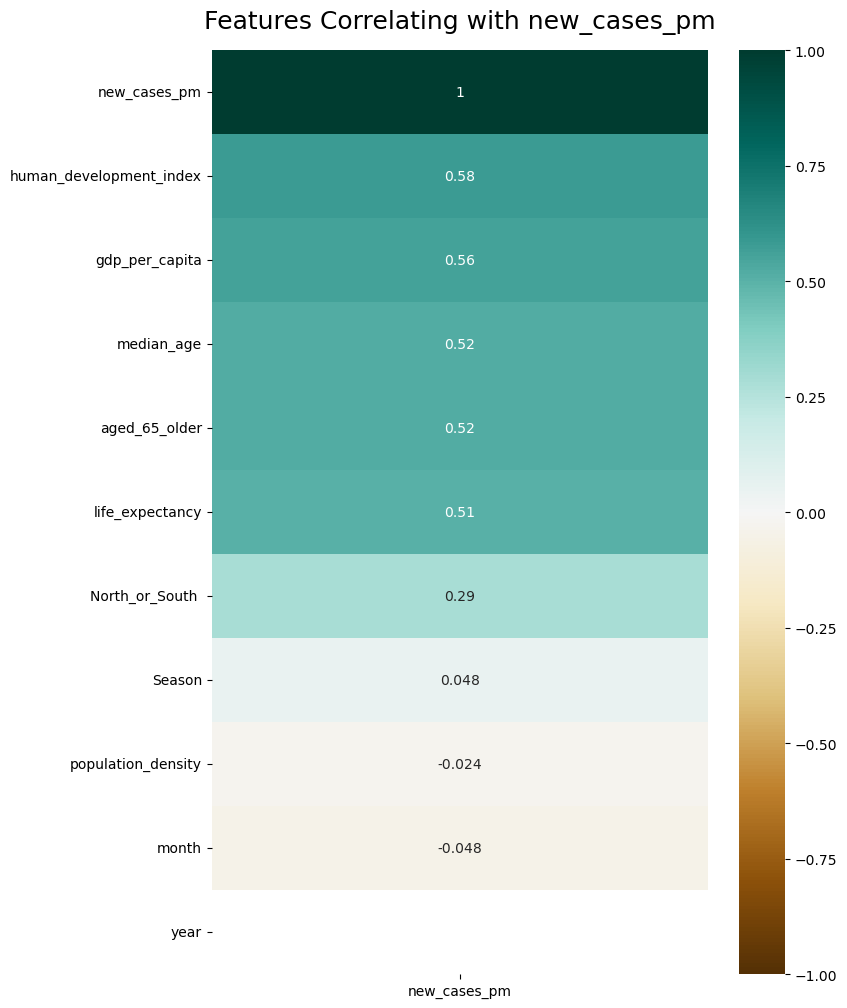

In [24]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df40.corr()[['new_cases_pm']].sort_values(by='new_cases_pm', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with new_cases_pm', fontdict={'fontsize':18}, pad=16);

In [25]:
#we need only the nomric columns
# Drop unuseless columns , we need only the nomric columns

df_f=df40.drop(columns=['continent','iso_code','location','date','location','year','locat_SOrN','month'])


**3.Creating the model**

a) Splitting variables into Predictors (x) and Response variable (y).
We split data into Predictors (x) as(month, population_density, median_age, aged_65_older, GDP_ per
capita, life_expectancy, human _development index, North or South) and target (y) as (new cases pm).

In [26]:
#1 .Split into on Predictors (x) and Respondse variable (y)
x=df_f.drop('new_cases_pm',axis=1)
y=df_f['new_cases_pm']

In [27]:
#2.Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=42)

In [28]:
#3.Fit Model with Training Data
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
model = DecisionTreeRegressor()

# fit the regressor with X and Y data
model.fit(x_train,y_train)

DecisionTreeRegressor()

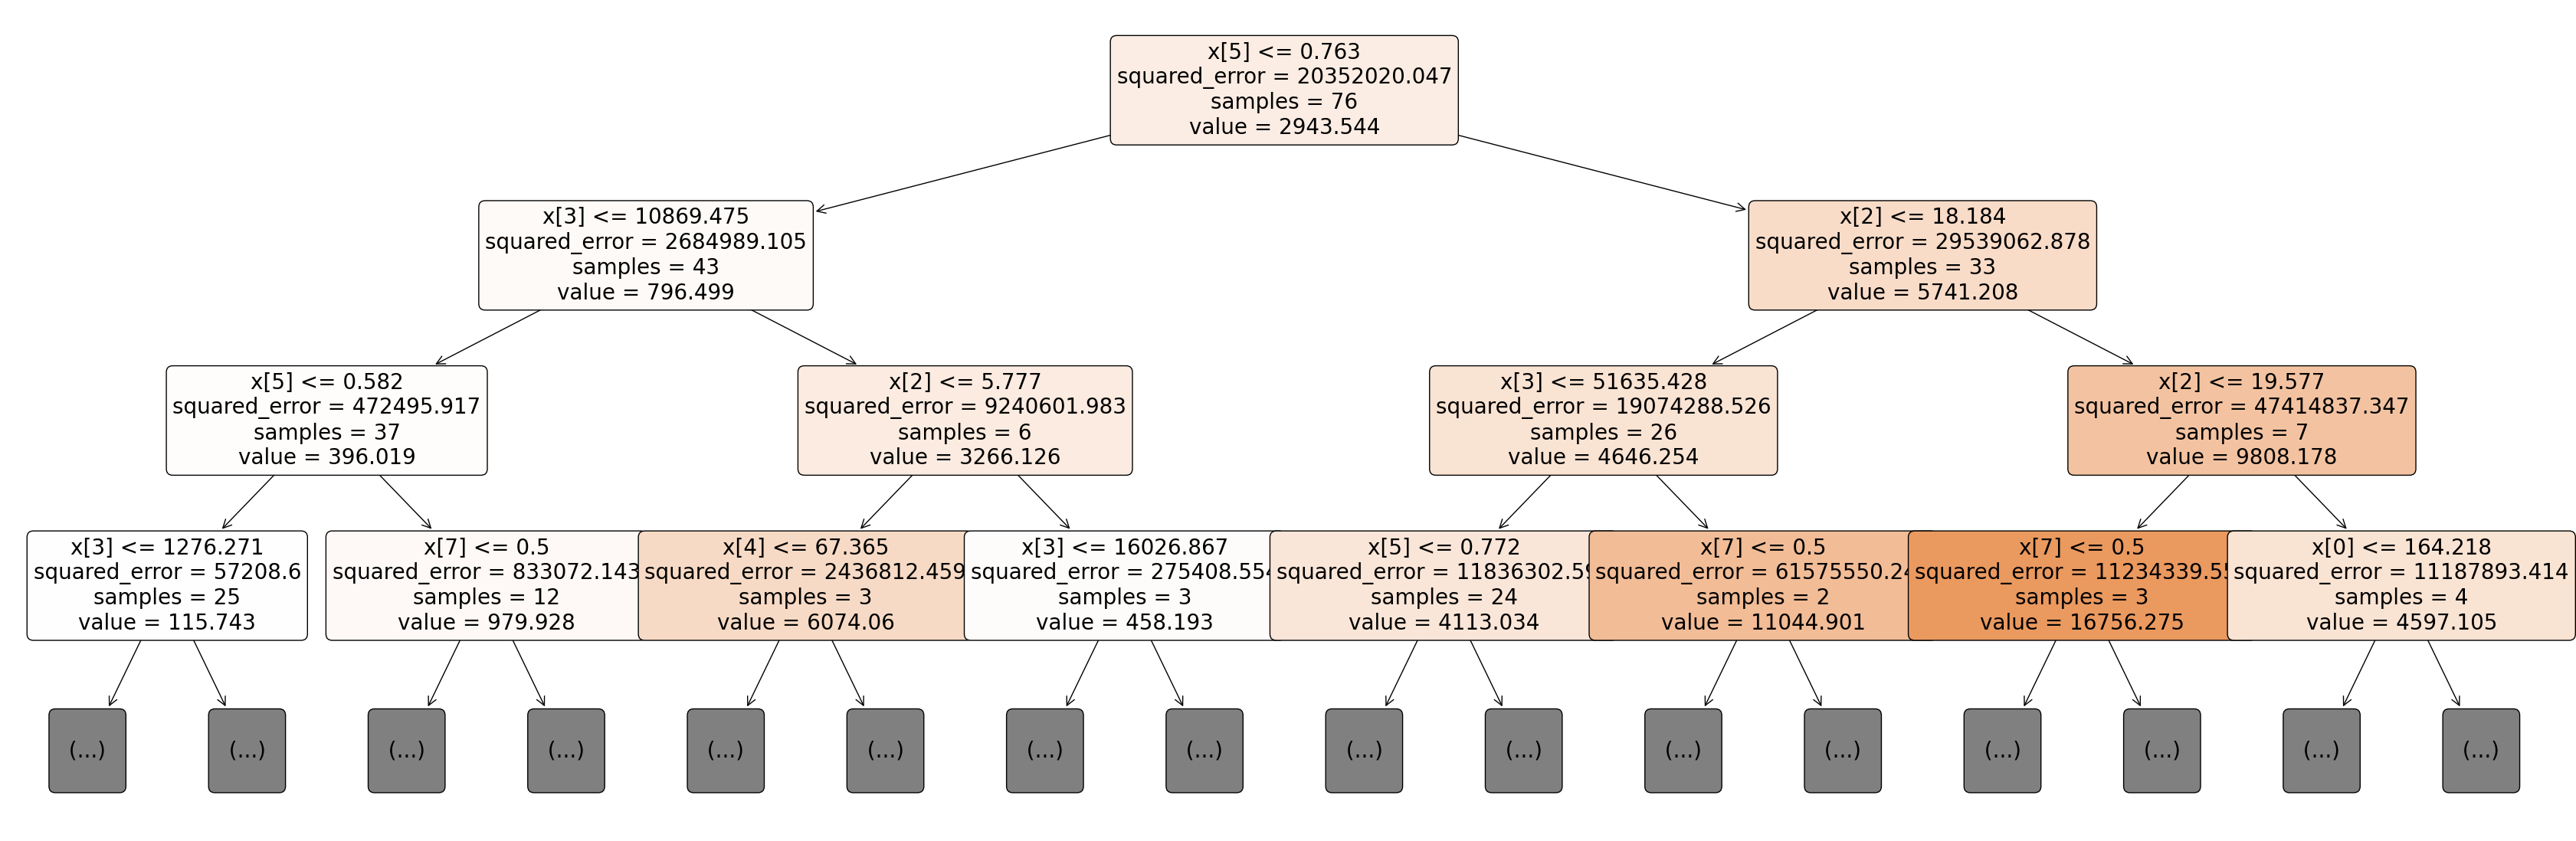

In [29]:
#Ploting the tree decicion
from sklearn import tree
fig=plt.figure(figsize=(43,14))
tree.plot_tree(model,filled=True,rounded=True,max_depth=3,fontsize=20)
plt.show()

**4. Evaluating the model using cross-validated metrics**

the easiest method to enhance the system's performance without sacrificing too much is to verify it using a tiny portion of the training data, since this will give us an indication of the model's capacity to predict unknown data.

 

K-fold cross-validation is a prominent type of cross-validation approach in which, for example, if k=5, 4 folds are used for training and 1 fold is used for testing, and this process repeats until all folds have a chance to be the test set one by one.

![/kaggle/input/cross-validation-img12/cross-validation.png](https://static.javatpoint.com/tutorial/machine-learning/images/cross-validation.png)

In [30]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)
Score=cross_val_score(model,x_train,y_train,cv=5)

score_mean=-Score.mean()

print("%0.2f accuracy with a standard deviation of %0.2f " %(score_mean, Score.std()))

0.70 accuracy with a standard deviation of 0.94 


By applying
this method to our model, we get these result of accuracy 70% of with a standard deviation of 0.94.Consequently, we can say that this method is considered the most proficient way to estimate our performance of machine
learning because it ensures that every observation has the opportunity to be clear in training and
testing the mode.

# Conclusion
To recapitulate, Machine learning is a powerful method to explain large dataset and create models
based on statistics. However, the data work up and classification is a very important step that can affect the final model. The classification and regression tree (CART) and cross-validation are the most
prominent parts for evaluating the performance of our model, especially if we need to alleviate
overfitting issue.